In [31]:
import os

data_path = os.path.join(os.getcwd(), 'data/agriculture-crops')

In [32]:
for folder in os.listdir(data_path):
    if '.DS_Store' in os.listdir(os.path.join(data_path, folder)):
        os.remove(os.path.join(data_path, folder, '.DS_Store'))

In [33]:
for folder in os.listdir(data_path):
    print(folder, len(os.listdir(os.path.join(data_path, folder))))

gram 21
sugarcane 23
lemon 25
rice 26
cotton 29
cucumber 28
chilli 21
cherry 29
tobacco_plant 30
cardamom 20
tea 21
jowar 27
wheat 28
coconut 23
almond 19
mustard_oil 25
clove 27
jute 21
pearl_millet-bajra 35
vigna_radiati-mung 24
banana 28
soyabean 25
papaya 21
fox_nut-makhana 21
pineapple 23
coffee_plant 26
tomato 24
olive_tree 27
sunflower 22
maize 28


In [34]:
image_paths = []
labels = []

for category in os.listdir(data_path):
    category_dir = os.path.join(data_path, category)
    for image_file in os.listdir(category_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(category_dir, image_file)
            image_paths.append(image_path)
            labels.append(category)

print(labels)

['gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton',

In [35]:
from PIL import Image
import numpy as np

images = []

for folder in os.listdir(data_path):
    for file in os.listdir(os.path.join(data_path, folder)):
        image = Image.open(os.path.join(data_path, folder, file))

        new_width = image.width // 10
        new_height = image.height // 10

        # Resize the image
        resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

        image = resized_image.convert('L')

        image = np.array(image).flatten()

        images.append(image)


/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_49458/297980304.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)


In [36]:
import cv2
for i in range(len(image_paths)):
    image = cv2.imread(image_paths[i])
    image = image.astype("float32") / 255.0
    image_paths[i] = image

In [37]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [BaggingClassifier(random_state=1234), RandomForestClassifier(random_state=1234), AdaBoostClassifier(random_state=1234), GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1234), MLPClassifier(random_state=1234)]

In [38]:
X_clf = images
y_clf = np.array(labels)

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

results_clf = {}
for classifier in classifiers:
    model_name = classifier.__class__.__name__
    clf_scores = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}

    for train_index, test_index in kf.split(X_clf, y_clf):
        X_train, X_test = np.array(X_clf)[train_index], np.array(X_clf)[test_index]
        y_train, y_test = np.array(y_clf)[train_index], np.array(y_clf)[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

        clf_scores['accuracy'].append(accuracy)
        clf_scores['f1'].append(f1)
        clf_scores['precision'].append(precision)
        clf_scores['recall'].append(recall)

    results_clf[model_name] = clf_scores

print(results_clf)

/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

{'BaggingClassifier': {'accuracy': [0.13333333333333333, 0.16, 0.1610738255033557, 0.15436241610738255, 0.14093959731543623], 'f1': [0.11794953194953195, 0.1688948828948829, 0.1521110880171283, 0.14702849460054354, 0.1335742557219067], 'precision': [0.15774603174603175, 0.24555555555555558, 0.272466757701657, 0.17111963353574094, 0.15447693618834557], 'recall': [0.13333333333333333, 0.16, 0.1610738255033557, 0.15436241610738255, 0.14093959731543623]}, 'RandomForestClassifier': {'accuracy': [0.18666666666666668, 0.20666666666666667, 0.19463087248322147, 0.19463087248322147, 0.18791946308724833], 'f1': [0.18181570281570283, 0.20998075998076, 0.18719377521193553, 0.18802850765938015, 0.1643952401458583], 'precision': [0.2397581699346405, 0.30813227513227515, 0.29649455689724147, 0.23471968002169344, 0.18411860324612003], 'recall': [0.18666666666666668, 0.20666666666666667, 0.19463087248322147, 0.19463087248322147, 0.18791946308724833]}, 'AdaBoostClassifier': {'accuracy': [0.08, 0.07333333

/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
accuracy = {}
f1 = {}
precision = {}
recall = {}

for i in results_clf:
    accuracy[i] = results_clf[i]['accuracy']
    f1[i] = results_clf[i]['f1']
    precision[i] = results_clf[i]['precision']
    recall[i] = results_clf[i]['recall']

In [41]:
avg_clf_results = {}
for model_name, model_scores in results_clf.items():
    print(model_name, ':')
    avg_clf_results[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_clf_results[model_name][metric] = np.mean(scores)

BaggingClassifier :
  accuracy 0.14994183445190157
  f1 0.14391165063679867
  precision 0.2002729829454662
  recall 0.14994183445190157
RandomForestClassifier :
  accuracy 0.19410290827740492
  f1 0.1862827971627274
  precision 0.2526446570463941
  recall 0.19410290827740492
AdaBoostClassifier :
  accuracy 0.0628814317673378
  f1 0.03461770891231229
  precision 0.5220387885820383
  recall 0.0628814317673378
GradientBoostingClassifier :
  accuracy 0.04946756152125279
  f1 0.033167820975288295
  precision 0.5613798356377276
  recall 0.04946756152125279
MLPClassifier :
  accuracy 0.042845637583892614
  f1 0.025859406074330932
  precision 0.29062063504027236
  recall 0.042845637583892614


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

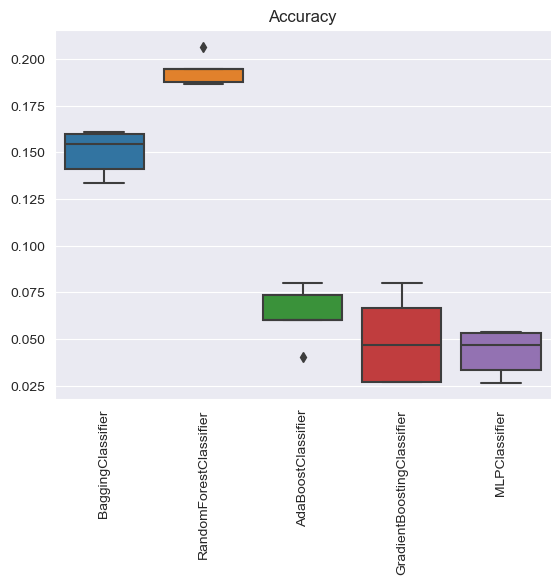

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(data=pd.DataFrame(accuracy)).set_title('Accuracy')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

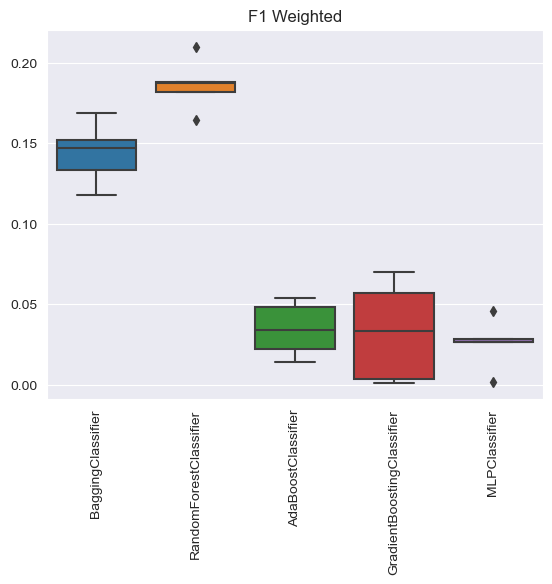

In [43]:
sns.boxplot(data=pd.DataFrame(f1)).set_title('F1 Weighted')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

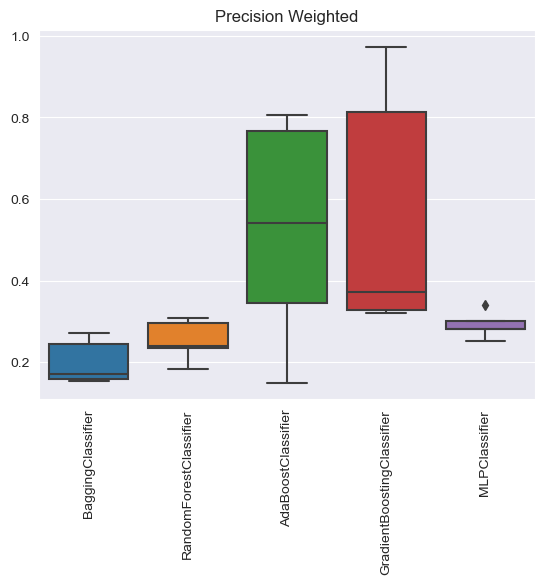

In [44]:
sns.boxplot(data=pd.DataFrame(precision)).set_title('Precision Weighted')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

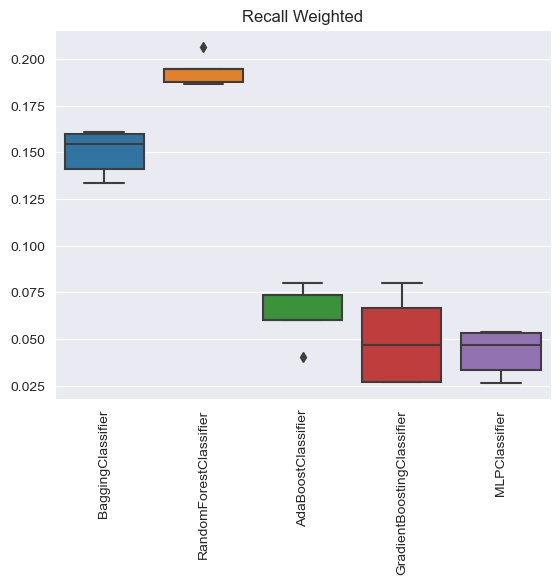

In [45]:
sns.boxplot(data=pd.DataFrame(recall)).set_title('Recall Weighted')
plt.xticks(rotation=90)

In [46]:
avg_accuracy = {}
avg_f1 = {}
avg_precision = {}
avg_recall = {}

for i in avg_clf_results:
    avg_accuracy[i] = avg_clf_results[i]['accuracy']
    avg_f1[i] = avg_clf_results[i]['f1']
    avg_precision[i] = avg_clf_results[i]['precision']
    avg_recall[i] = avg_clf_results[i]['recall']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

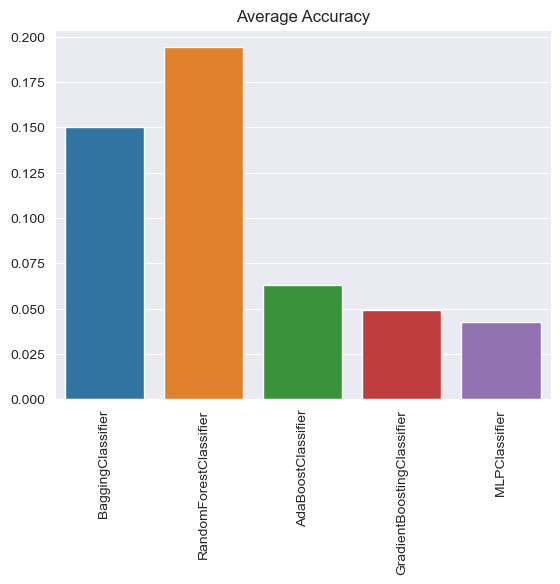

In [47]:
sns.barplot(x=list(avg_accuracy.keys()), y=list(avg_accuracy.values())).set_title('Average Accuracy')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

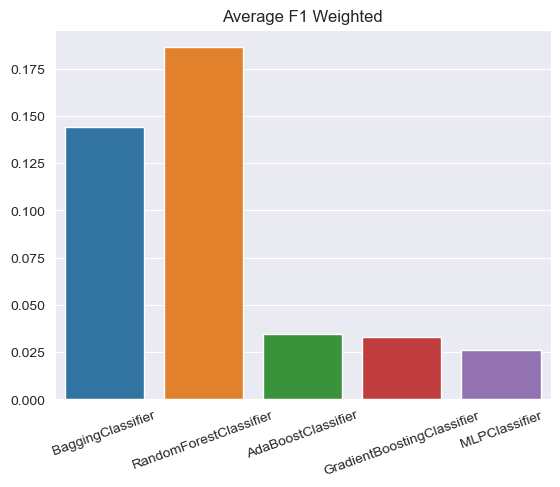

In [48]:
sns.barplot(x=list(avg_f1.keys()), y=list(avg_f1.values())).set_title('Average F1 Weighted')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

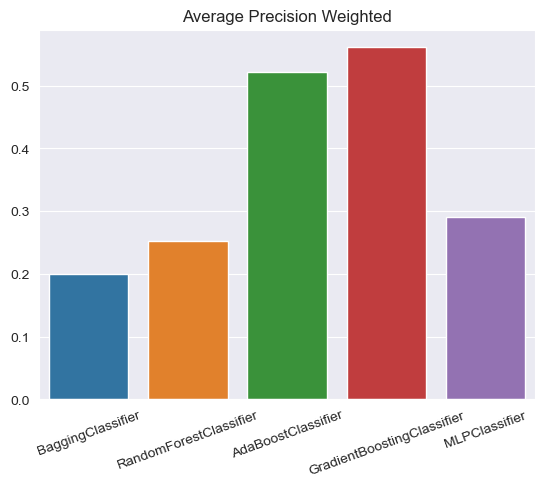

In [49]:
sns.barplot(x=list(avg_precision.keys()), y=list(avg_precision.values())).set_title('Average Precision Weighted')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'MLPClassifier')])

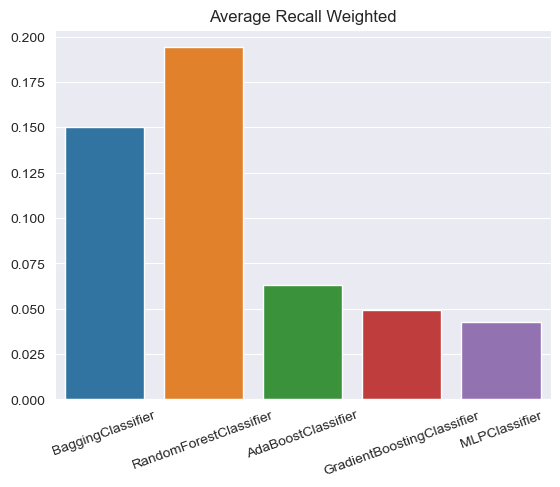

In [50]:
plt.xticks(rotation=20)
sns.barplot(x=list(avg_recall.keys()), y=list(avg_recall.values())).set_title('Average Recall Weighted')
plt.xticks(rotation=20)